# CNN(Convolutional Neural Network)

이정재  
2024-05-03

## CNN’s Structure

![](https://images.squarespace-cdn.com/content/v1/5acbdd3a25bf024c12f4c8b4/1593967518672-RPGLD1X41M4OXWENZ0BN/CNN+Structure.jpg?format=2500w)  
(사진 0) https://www.ml-science.com/convolutional-neural-networks  
\* 앞 부분이 `Feature Extractor`, 뒷 부분이 `FC layer`이다. \*
`Feature Extractor`에서는 말 그대로 사진의 특징을 추출하는 부분이다. \*
`FC layer`에서는 추출된 특징을 가지고 학습하는 부분이다.

## Feature Extractor

<img src = "https://d2l.ai/_images/lenet.svg" width="800" height="500">  
(사진 1) https://d2l.ai/chapter_convolutional-neural-networks/lenet.html

-   다음은 LeNet Architecture의 구조이다.
-   28 x 28 imgae의 사진에서 feature를 추출하는 모습을 대략적을 보여주고
    있다.
-   Feature Extractor는 CNN에서 메인이 되는 부분이다.

### 1. Convolution

-   (사진 1)의 28x28 image에 보이는 `파란색 사각형`이 이미지를 훑으면서
    Feature를 추출하고 있다.
-   `파란색 사각형`은 **Convolutional filter(Conv filter)**, **kernel**
    등으로 불린다.
-   kernel의 사이즈는 3x3, 5x5, 7x7, 등 다양하며, 경우에 따라 사용되는
    사이즈가 다르다.

#### `-` **Striding**

-   kernel이 image를 훑는 과정에서 몇칸씩 이동할 것인지 정하는 개념이다.
-   예를 들어 striding=1이라면, kernel은 한칸씩, striding=2라면,
    kernel은 두칸씩 이동한다.
-   다음은 Striding=1인 kernel이 image를 훑는 과정을 시각화 한 것이다.

<img src = "https://i.stack.imgur.com/9OZKF.gif" width = "500" height = "350">  
(사진2)
https://stats.stackexchange.com/questions/296679/what-does-kernel-size-mean/296701

-   사진(2)에서는 3x3 kernel이 쓰였다.
-   kernel이 이동할 때 마다, kernel에 적혀진 숫자와 image의 pixel을
    곱하고 더한 뒤에(합성곱을 해준 뒤에), 한 pixel에 나타낸다.(9개의
    pixel $\rightarrow$ 1개의 pixel로 변환)

![](https://jeiwan.net/images/convolution-filter-example.png)  
(사진 2.5) https://jeiwan.net/posts/til-convolution-filters-are-weights/
\* Conv filter 의 간단한 예시와 결과이다.

#### `-` **Padding**

-   9개의 pixel이 1개의 pixel로 축소됨에 따라 원래 이미지의 사이즈는
    줄어들 수 밖에 없다.
-   사이즈 축소를 막기 위해 사용된 것이 `padding`으로 (사진 2)에서
    보이는 것 처럼, 화소 0값으로 pixel들을 둘러 쌓고 있는 것을 말한다.

<img src = "https://d2l.ai/_images/lenet.svg" width="800" height="500">  
(사진 1) https://d2l.ai/chapter_convolutional-neural-networks/lenet.html

-   (사진 1)을 다시 살펴보자. C1 feature map에는 6개의 feature맵이
    생성되었다.
-   6개의 kernel이 사용되었다는 말과 동치이다.
-   C1 feature map $\rightarrow$ S2 featuremap 과정을 살펴보면, feature
    map 크기가 줄었다.
-   이는 feature map의 size는 `padding`으로 인해 유지하였지만, 0이 아닌
    pixel의 수는 줄어들었기 때문이다.
-   `Pooling` 때문이다.

#### `-` **Pooling**

<img src="https://production-media.paperswithcode.com/methods/MaxpoolSample2.png" width="500" height="350">  
(사진 3) https://paperswithcode.com/method/max-pooling

-   (사진 3)은 2x2 Max Pooling을 시각화 한 것이다.(Max 이외에도 Average,
    Min Pooling등이 가능하다.)
-   image를 2x2로 쪼갠 뒤에, 그 중에서 가장 큰 값만 추출하는 것이다.
-   Max Pooling을 사용하는 이유는, 주변 pixel 중에서 최대값만
    추출하여(특징이 가장 잘 나타나는 pixel만 추출하여), 좀 더 세부적인
    특징을 추출하기 위함이다.
-   Max Pooling을 하게 되면 0이 아닌 pixel의 수가 줄면서(=특징이 가장 잘
    나타나는 pixel만 남으면서) 좀 더 자세한 특징들을 추출할 수 있다.
-   즉, 적어진 pixel들을 같은 size의 kernel이 지나가면서 더 자세한
    특징들을 추출할 수 있게 된다.

#### `-` **Generalization**

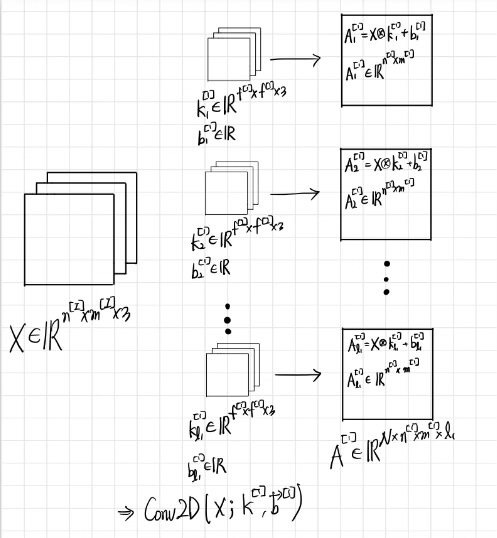  
(사진 4)

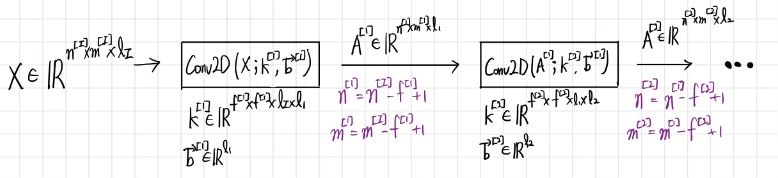  
(사진 5)

(사진 4) \* 앞서 설명했던 내용을 그림으로 나타내면 다음과 같다. \* 컬러
이미지 $X$는 첫번째 kernel을 통과하는데, 이때 kernel의 개수는
$l_1$개이고, kernel의 사이즈는 $f^{[1]}$ x $f^{[1]}$이다. \*
$k_{i}^{[1]}$ 커널을 지나간 이미지는 $A_i^{[1]}$로 표현된다.
($A_i^{[1]} \in R^{n^{[1]} \,\text{x} \,n^{[1]}}$)

(사진 5) \* (사진 4)과정을 계속 이어나가는 것을 시각화한 것이다. \*
kernel을 지나가는 과정에서 padding과 striding=1이 적용되었다.

#### `-` **Visualization**

-   (사진 4)와 (사진 5)를 시각화한 것이다.

<img src="https://i.stack.imgur.com/2ezvr.gif" width="400" height="300">  
https://stats.stackexchange.com/questions/296679/what-does-kernel-size-mean/296701